In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = Path("data/dog/train")
path

PosixPath('data/dog/train')

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
data.classes

['dingo', 'dog']

In [6]:
for c in data.classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dingo


dog


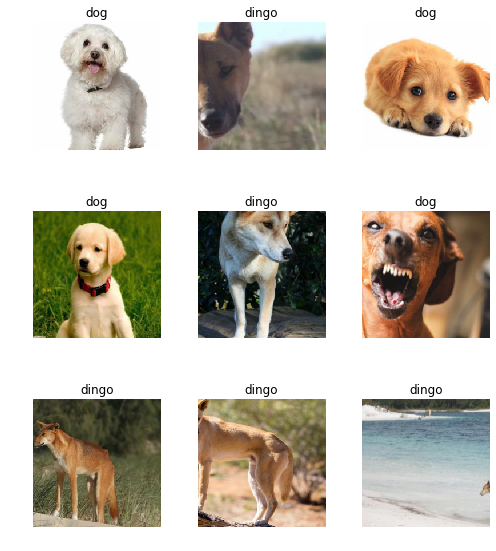

In [7]:
data.show_batch(rows=3, figsize=(7,8))

In [8]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dingo', 'dog'], 2, 672, 168)

In [9]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,0.522666,0.195251,0.095238
2,0.357908,0.190142,0.071429
3,0.285280,0.214775,0.059524
4,0.234725,0.218334,0.059524


In [11]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 6.31E-07


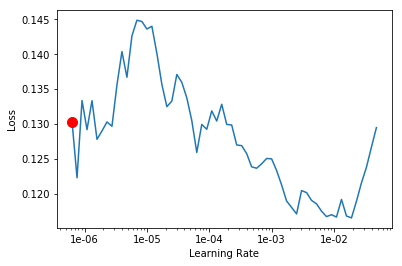

In [12]:


learn.recorder.plot()



In [13]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.124936,0.218173,0.065476
2,0.116925,0.216221,0.065476


In [14]:
learn.save('stage-2')

In [15]:
learn.load('stage-2');

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

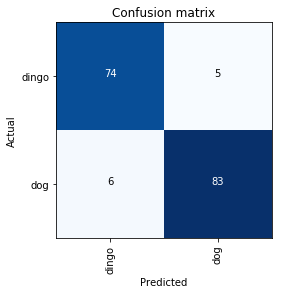

In [17]:
interp.plot_confusion_matrix()

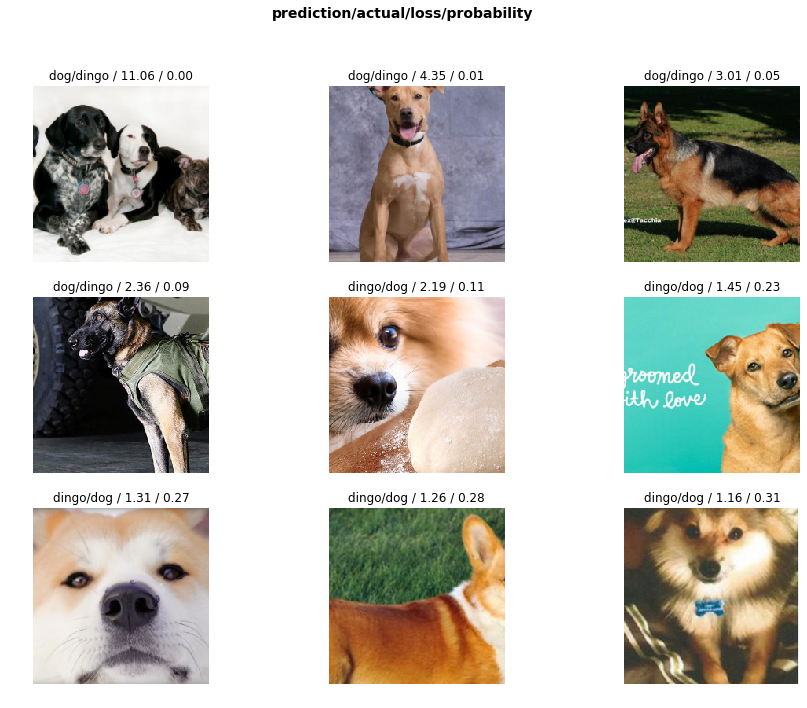

In [18]:
interp.plot_top_losses(9, figsize=(15,11))

In [19]:
learn.export()

In [20]:
learn = load_learner(path)